# **Outliers**

In [28]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../")
from src import funciones_outliers as fo


In [29]:
df = pd.read_csv("../datos/df_madrid_nonulls_encoded.csv", index_col = 0)
df.head()

,price,size,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_True
0,750.0,60.0,1,1,705.633132,7037,697.639893,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,70.0,2,1,701.404755,16145,678.663637,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,400.0,67.0,2,2,654.804079,55041,696.091764,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,590.0,70.0,3,2,679.524689,56596,670.416382,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,684.0,45.0,0,1,705.633132,10656,670.416382,-1,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [30]:
df["distance"] = df["distance"].astype("float")

In [31]:
univariados = fo.GestionOutliersUnivariados(df)

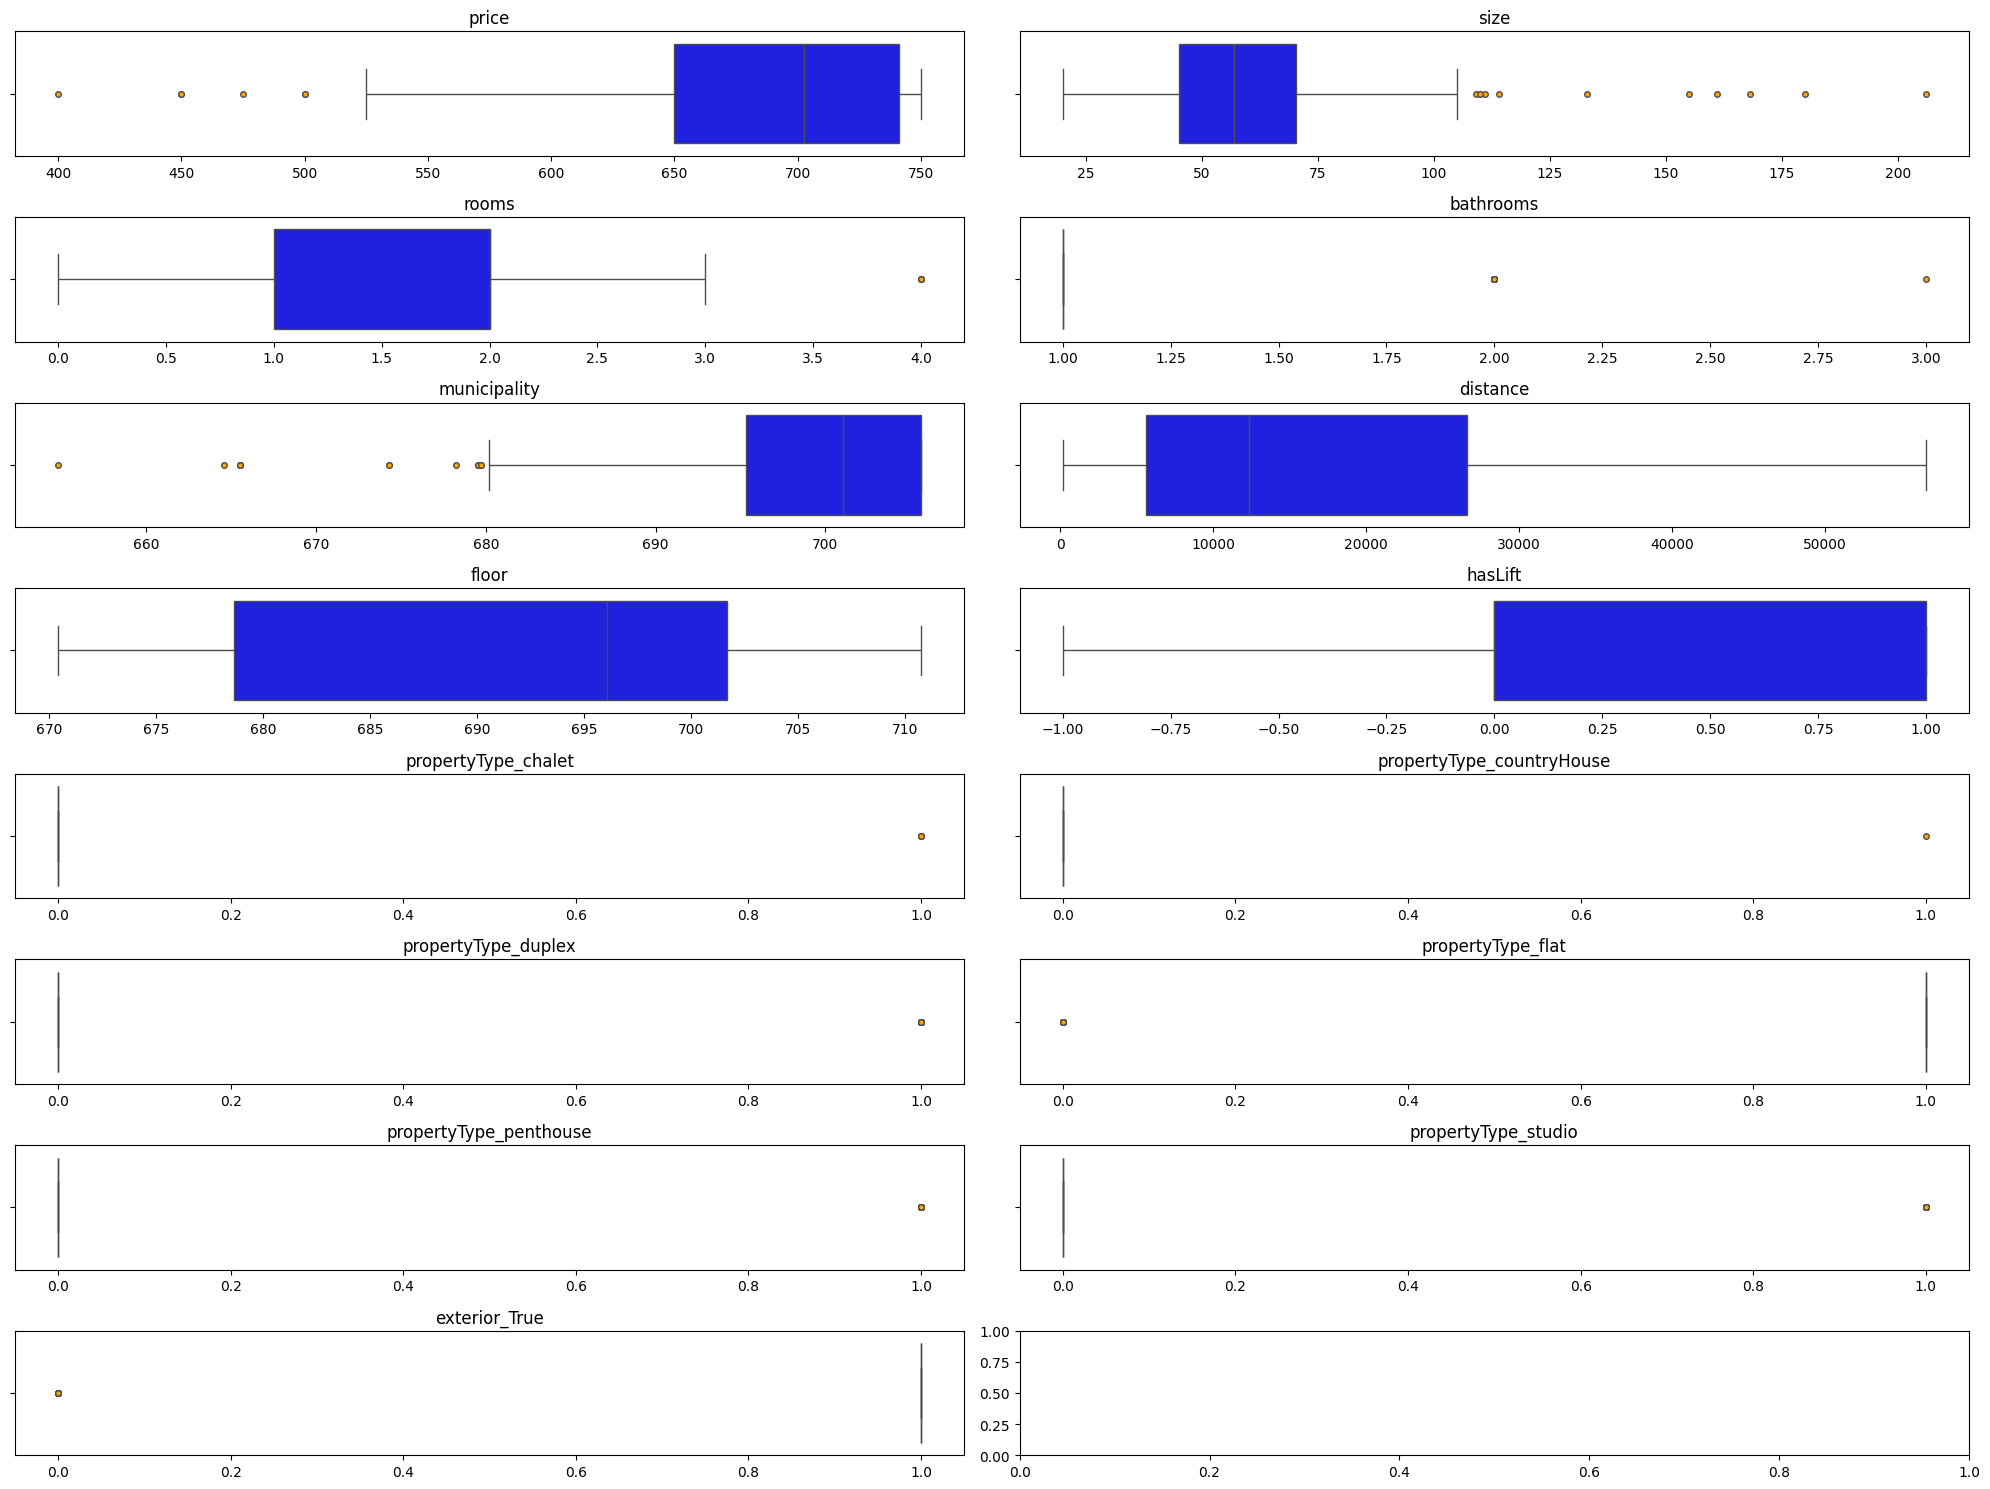

In [32]:
univariados.visualizar_outliers_univariados()

Después de haber hecho el encoding es un poco más dificil de visualizar este gráfico, pero podemos identificar outliers univariados en precios por debajo de 500 que podemos ver 4 casas, en size que hay varios a partir de 100 y en municipiosaunque esta variable era categórica y habrá outliers ya que seguramente haya municipios en los cuales haya muy poquitas casas y aparecen como outliers.

Veamoslos con el IQR:

In [33]:
diccionario_iqr = univariados.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna PRICE es 6
La cantidad de outliers que tenemos para la columna SIZE es 11
La cantidad de outliers que tenemos para la columna ROOMS es 3
La cantidad de outliers que tenemos para la columna BATHROOMS es 38
La cantidad de outliers que tenemos para la columna MUNICIPALITY es 13
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_CHALET es 3
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_COUNTRYHOUSE es 1
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_DUPLEX es 14
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_FLAT es 76
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_PENTHOUSE es 10
La cantidad de outliers que tenemos para la columna PROPERTYTYPE_STUDIO es 48
La cantidad de outliers que tenemos para la columna EXTERIOR_TRUE es 68


Los outliers de las variables categoricas que hemos transformado no nos interesan ya que estos tienen sentido y hay que mantenerlos. 

Vamos a ver también los outliers multivariados:

In [34]:
multi = fo.GestionOutliersMultivariados(df)

,price,size,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,...,exterior_True,outliers_ifo_0.01_10,outliers_ifo_0.01_100,outliers_ifo_0.01_200,outliers_ifo_0.05_10,outliers_ifo_0.05_100,outliers_ifo_0.05_200,outliers_ifo_0.1_10,outliers_ifo_0.1_100,outliers_ifo_0.1_200
0,750.0,60.0,1,1,705.633132,7037.0,697.639893,1,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
1,750.0,70.0,2,1,701.404755,16145.0,678.663637,0,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
2,400.0,67.0,2,2,654.804079,55041.0,696.091764,0,0.0,0.0,...,1.0,1,1,1,-1,-1,-1,-1,-1,-1
3,590.0,70.0,3,2,679.524689,56596.0,670.416382,0,0.0,0.0,...,1.0,1,1,1,-1,-1,-1,-1,-1,-1
4,684.0,45.0,0,1,705.633132,10656.0,670.416382,-1,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,640.0,69.0,2,1,686.030112,29311.0,696.091764,1,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
348,700.0,54.0,1,1,696.164991,11656.0,701.697962,1,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
349,700.0,59.0,1,1,705.633132,7529.0,697.466096,1,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1
350,700.0,75.0,2,1,699.609626,30359.0,701.697962,0,0.0,0.0,...,1.0,1,1,1,1,1,1,1,1,1


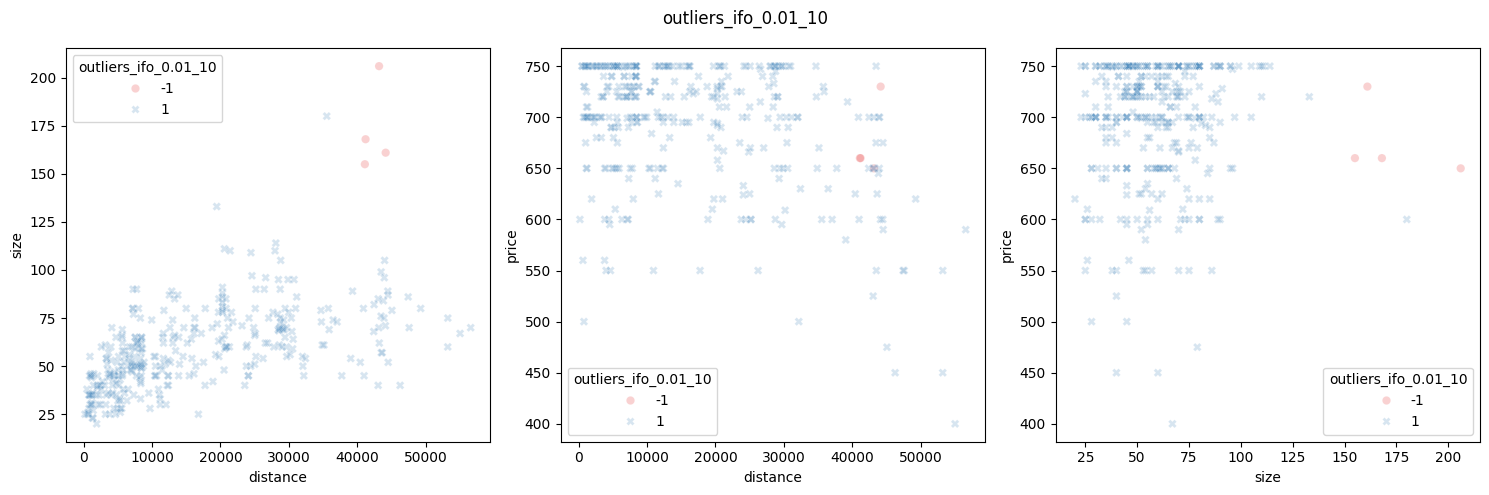

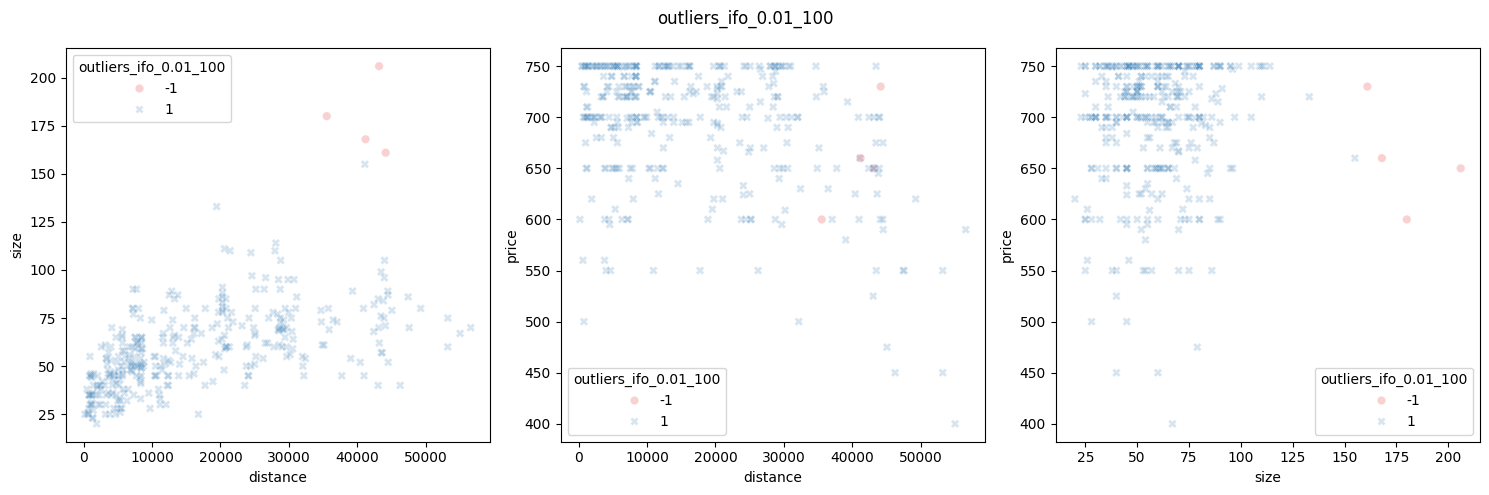

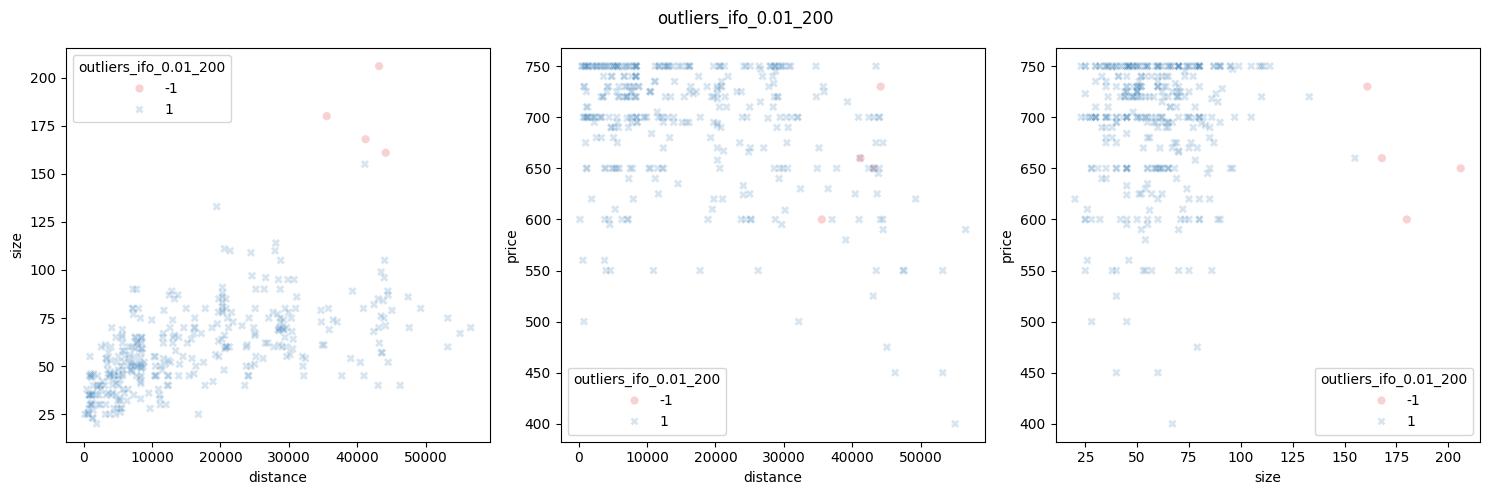

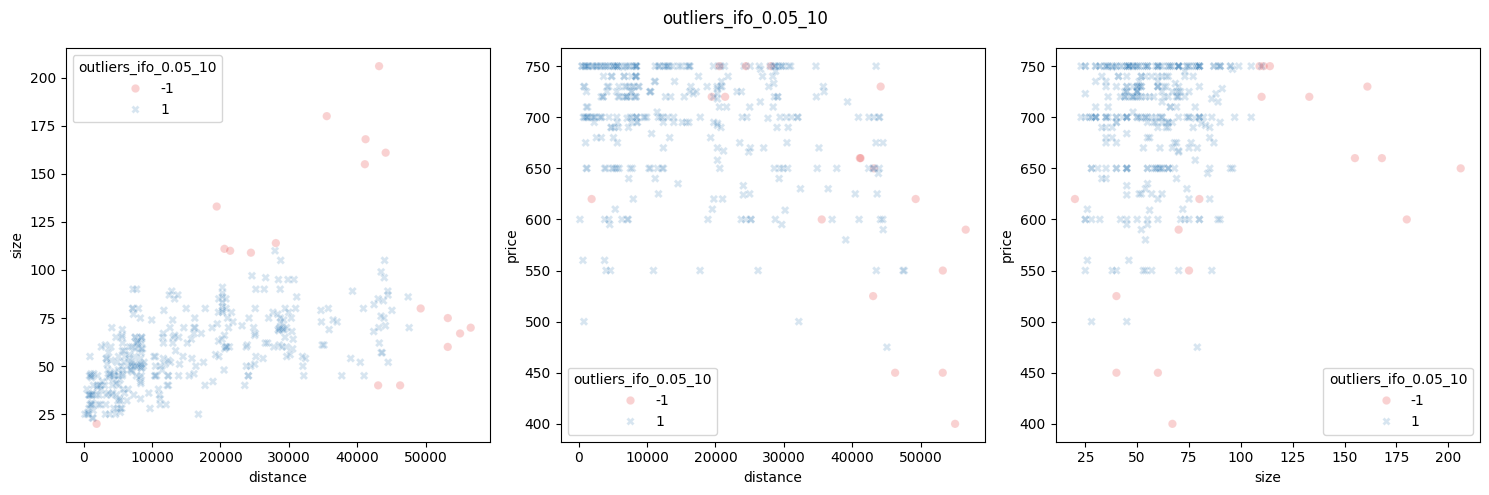

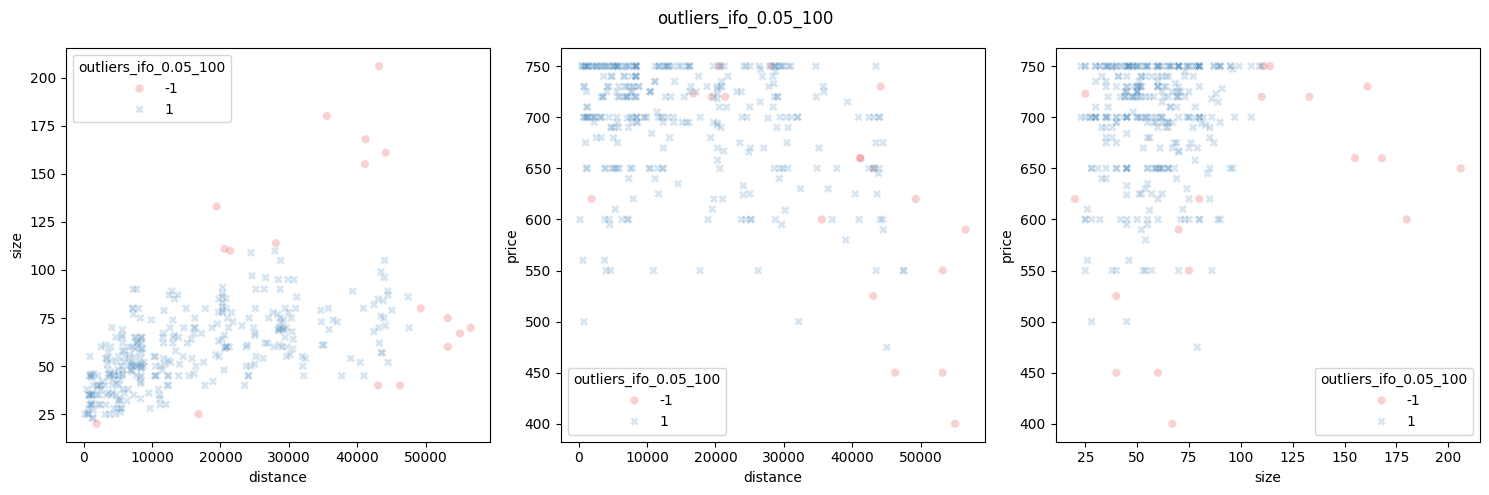

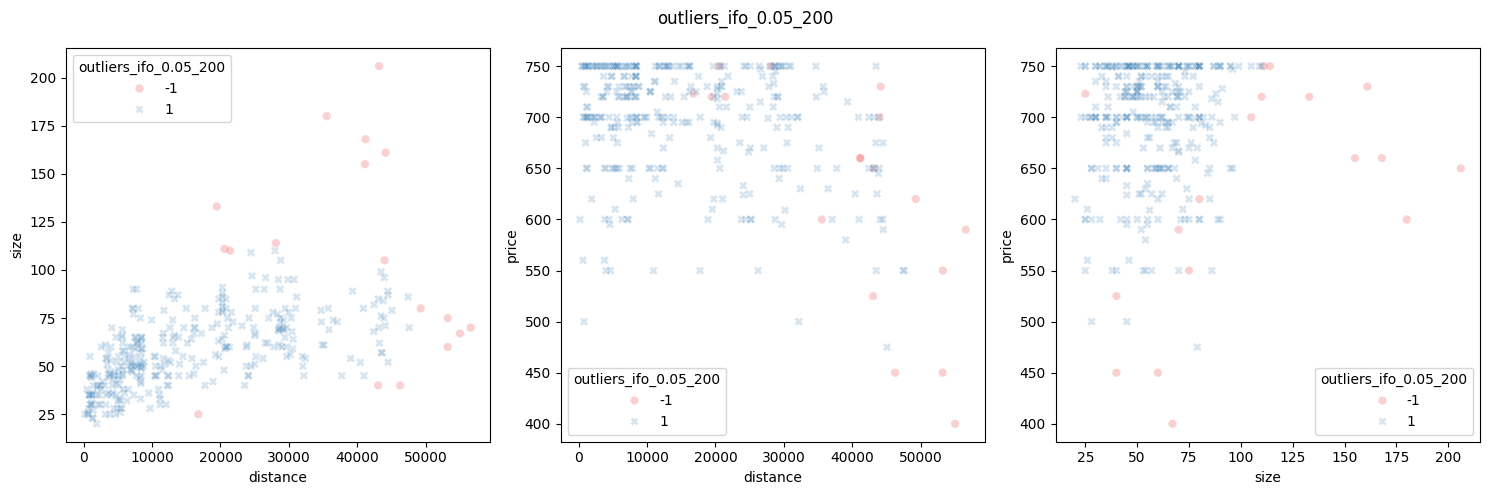

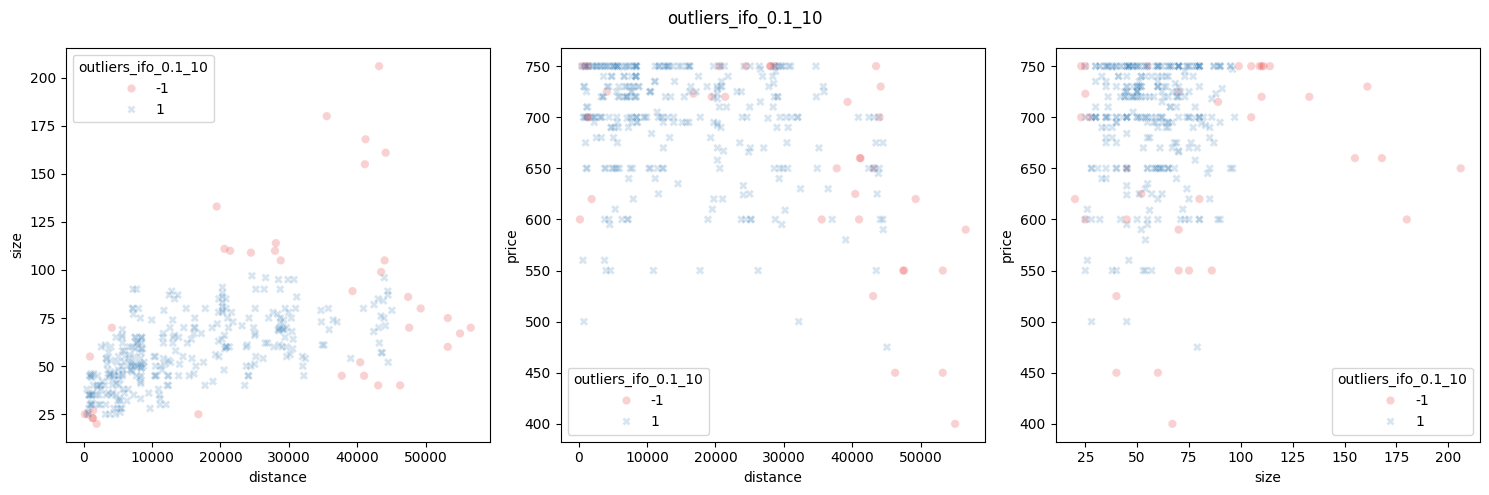

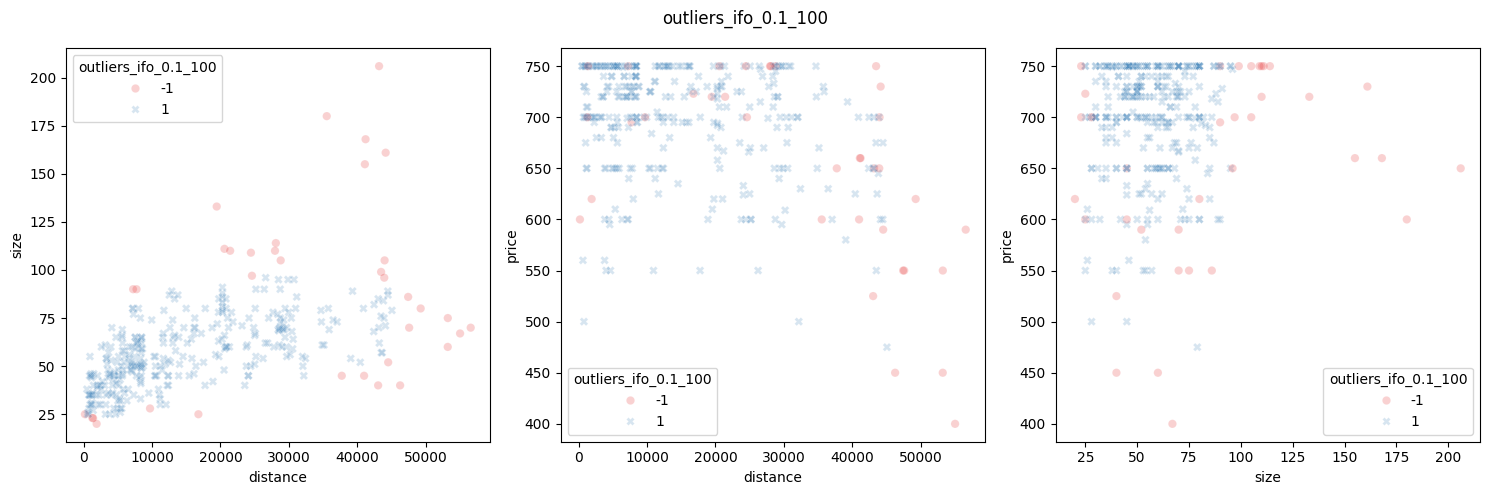

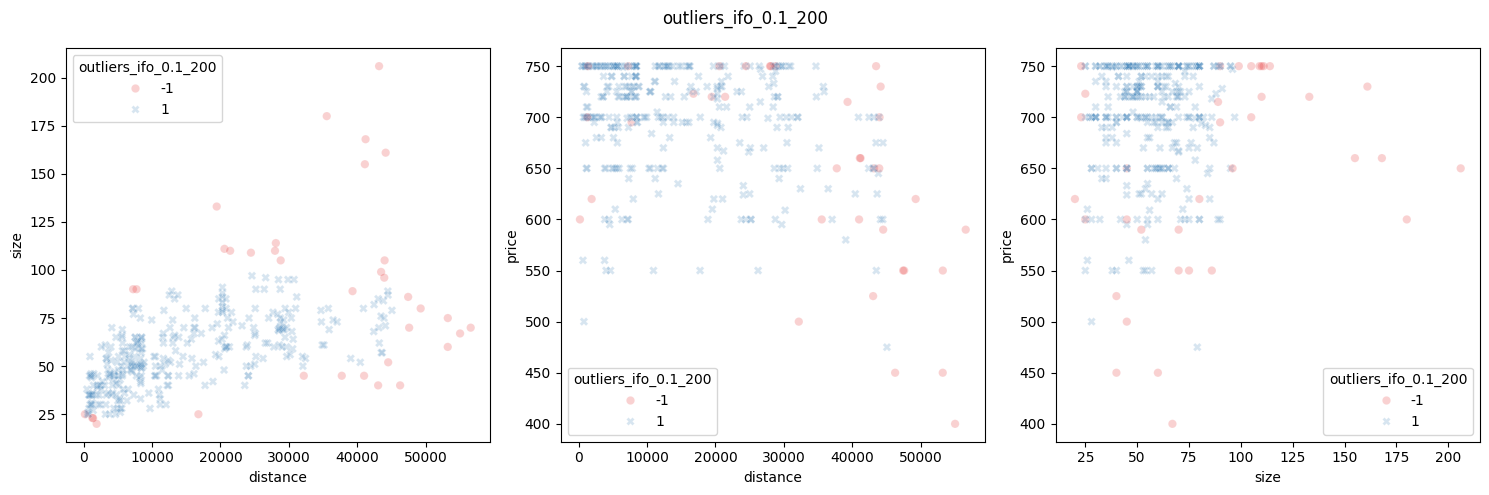

In [35]:
contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]
cols = ["distance", "size"]
vr = "price"
multi.detectar_outliers_if(cols, vr, contaminacion, estimadores)

Aparecen muy pocos outliers, pero como podemos ver es verdad que hay datos muy esparcidos. Vamos a intentar hacer un primer modelo haciendo una limpieza rápida. Vamos a quitarnos las casas con un size mayor de 100 que son los más claros y es solo un 3% de los datos, por lo que si llega una casa con más de 100 metros cuadrados aunque mantuviesemos los datos hay tan pocos que el modelo tendería a predecir mal.

In [36]:
filtro = (df["size"] > 100) | (df["price"] <= 550)
perc = round(df[filtro].shape[0] / df.shape[0] * 100, 2)
print(f"Porcentaje de casas que cumplen las condiciones: {perc}%")

Porcentaje de casas que cumplen las condiciones: 8.24%


In [37]:
df_nonulls_encoded_sinout = df[~filtro].reset_index(drop=True)


Almecanamos el dataframe:

In [38]:
df_nonulls_encoded_sinout.to_csv("../datos/df_madrid_nonulls_encoded_sinout.csv")